In [9]:
import pandas as pd
import geopandas as gpd
import numpy as np

from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt
import pydeck as pdk

## 1차 클러스터링
목표: 산 & 강 분류하기

토지 복합도, 압축도를 이용하여 KMeans 클러스터링을 통해 산, 강 구분

### 데이터 불러오기

In [10]:
compressibility = pd.read_excel('../데이터/입지분석/전처리_공통/압축도/500m 격자별 압축도.xlsx', index_col=0)
complexity = pd.read_excel('../데이터/입지분석/전처리_공통/복합도/500m 격자별 복합도.xlsx', index_col=0)

compressibility.head()

,압축도
gid,
다사52a53a,103.24
다사52a54a,0.04
다사52a55a,3.78
다사52a56a,66.87
다사52a57a,24.82


압축도, 복합도 중 미스매칭/결측치는 -999로 되어있기 때문에 모두 0으로 처리해주었다.

In [11]:
compressibility[compressibility['압축도'] < 0] = 0
complexity[complexity['복합도'] < 0] = 0

적절한 군집수 설정하기

Elbow method: k = 3

c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


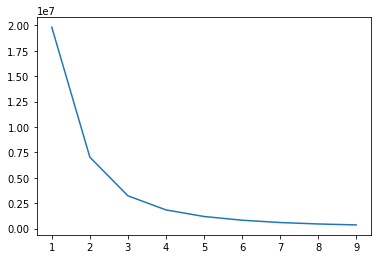

In [12]:
KS = range(1, 10)
inertia = list()

x = complexity.join(compressibility)

for k in KS:
    model_test = KMeans(k)
    predict_test = model_test.fit(x)
    inertia.append(predict_test.inertia_)

sns.lineplot(KS, inertia)
plt.show()

모델 훈련

In [13]:
model = KMeans(3, n_init=20, random_state=42)
predict = model.fit(x)

In [14]:
x.loc[:,'predict'] = predict.labels_

0번 집단이 압축도, 복합도가 낮은 것으로 보아 산, 강에 해당할 것으로 보임

In [15]:
x.groupby('predict')['압축도', '복합도'].mean()

C:\Users\ms964\AppData\Local\Temp\ipykernel_26648\2491448062.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x.groupby('predict')['압축도', '복합도'].mean()


,압축도,복합도
predict,,
0,300.482527,10.274194
1,20.168456,3.564614
2,140.707595,9.982424


### 시각화

In [16]:
# grid 정보 불러오기
grid = gpd.read_file('../데이터/입지분석/전처리_공통/격자/시범 전기차충전소(시군구격자) 접근성.shp', encoding = 'utf8')
grid

,gid,sgg_nm_k,sgg_nm_e,sgg_cd,sido_nm_k,sido_nm_e,sido_cd,value,stats_year,raw_d_year,geometry
0,다사55a53b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,1.609,2021,202112,"POLYGON ((955000.000 1953500.000, 955000.000 1..."
1,다사53a53a,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.402,2021,202112,"POLYGON ((953000.000 1953000.000, 953000.000 1..."
2,다사52b53a,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.535,2021,202112,"POLYGON ((952500.000 1953000.000, 952500.000 1..."
3,다사53a57b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,1.357,2021,202112,"POLYGON ((953000.000 1957500.000, 953000.000 1..."
4,다사53a54b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.701,2021,202112,"POLYGON ((953000.000 1954500.000, 953000.000 1..."
...,...,...,...,...,...,...,...,...,...,...,...
419167,나바98a83b,None,None,None,None,None,None,7.706,2021,202112,"POLYGON ((898000.000 1883500.000, 898000.000 1..."
419168,마바76a57a,None,None,None,None,None,None,3.802,2021,202112,"POLYGON ((1176000.000 1857000.000, 1176000.000..."
419169,나바97a87b,None,None,None,None,None,None,4.755,2021,202112,"POLYGON ((897000.000 1887500.000, 897000.000 1..."
419170,나바97a25b,None,None,None,None,None,None,0.662,2021,202112,"POLYGON ((897000.000 1825500.000, 897000.000 1..."


In [17]:
grid = grid[grid['sido_nm_k'] == '서울특별시']
grid = grid[['gid', 'geometry']]

grid

,gid,geometry
0,다사55a53b,"POLYGON ((955000.000 1953500.000, 955000.000 1..."
1,다사53a53a,"POLYGON ((953000.000 1953000.000, 953000.000 1..."
2,다사52b53a,"POLYGON ((952500.000 1953000.000, 952500.000 1..."
3,다사53a57b,"POLYGON ((953000.000 1957500.000, 953000.000 1..."
4,다사53a54b,"POLYGON ((953000.000 1954500.000, 953000.000 1..."
...,...,...
2415,다사70b52a,"POLYGON ((970500.000 1952000.000, 970500.000 1..."
2416,다사67b48a,"POLYGON ((967500.000 1948000.000, 967500.000 1..."
2417,다사68a47a,"POLYGON ((968000.000 1947000.000, 968000.000 1..."
2418,다사68a51a,"POLYGON ((968000.000 1951000.000, 968000.000 1..."


In [18]:
def polygon_to_coordinates(x): 
    lon, lat = x.exterior.xy 
    return [[x, y] for x, y in zip(lon, lat)]

In [19]:
grid = grid.to_crs(epsg = 4326)
grid['coordinates'] = grid['geometry'].apply(polygon_to_coordinates)
grid = grid.set_index('gid')
grid

,geometry,coordinates
gid,,
다사55a53b,"POLYGON ((126.99035 37.57979, 126.99032 37.584...","[[126.99035203836993, 37.57978500226289], [126..."
다사53a53a,"POLYGON ((126.96773 37.57518, 126.96770 37.579...","[[126.96773397496594, 37.57517845860917], [126..."
다사52b53a,"POLYGON ((126.96207 37.57515, 126.96204 37.579...","[[126.9620717979233, 37.575152792602694], [126..."
다사53a57b,"POLYGON ((126.96744 37.61574, 126.96741 37.620...","[[126.9674449940854, 37.615737545688575], [126..."
다사53a54b,"POLYGON ((126.96764 37.58870, 126.96761 37.593...","[[126.96763771237315, 37.58869818555969], [126..."
...,...,...
다사70b52a,"POLYGON ((127.16595 37.56689, 127.16593 37.571...","[[127.16595438985028, 37.56689227220022], [127..."
다사67b48a,"POLYGON ((127.13216 37.53074, 127.13214 37.535...","[[127.13216147862678, 37.5307376437907], [127...."
다사68a47a,"POLYGON ((127.13786 37.52174, 127.13784 37.526...","[[127.1378640024237, 37.52174168809255], [127...."


In [20]:
graph = grid.join(x)

graph

,geometry,coordinates,복합도,압축도,predict
gid,,,,,
다사55a53b,"POLYGON ((126.99035 37.57979, 126.99032 37.584...","[[126.99035203836993, 37.57978500226289], [126...",2,1.03,1
다사53a53a,"POLYGON ((126.96773 37.57518, 126.96770 37.579...","[[126.96773397496594, 37.57517845860917], [126...",13,92.83,2
다사52b53a,"POLYGON ((126.96207 37.57515, 126.96204 37.579...","[[126.9620717979233, 37.575152792602694], [126...",10,35.05,1
다사53a57b,"POLYGON ((126.96744 37.61574, 126.96741 37.620...","[[126.9674449940854, 37.615737545688575], [126...",0,0.00,1
다사53a54b,"POLYGON ((126.96764 37.58870, 126.96761 37.593...","[[126.96763771237315, 37.58869818555969], [126...",6,33.11,1
...,...,...,...,...,...
다사70b52a,"POLYGON ((127.16595 37.56689, 127.16593 37.571...","[[127.16595438985028, 37.56689227220022], [127...",3,52.86,1
다사67b48a,"POLYGON ((127.13216 37.53074, 127.13214 37.535...","[[127.13216147862678, 37.5307376437907], [127....",15,186.03,2
다사68a47a,"POLYGON ((127.13786 37.52174, 127.13784 37.526...","[[127.1378640024237, 37.52174168809255], [127....",1,2.88,1


In [21]:
layer = pdk.Layer(
    'PolygonLayer', # 사용할 Layer 타입
    graph[graph['predict'] == 1], # 시각화에 쓰일 데이터프레임
    get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
    get_fill_color='[100, 120, 255,100]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
    pickable=True, # 지도와 interactive 한 동작 on
    auto_highlight=True # 마우스 오버(hover) 시 박스 출력
    ,coverage = 1
)

center_seoul = [127.001699, 37.564214]

view_state = pdk.ViewState(
    longitude=center_seoul[0],
    latitude=center_seoul[1],
    zoom=10)

r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.show()

DeckGLWidget(carto_key=None, custom_libraries=[], google_maps_key=None, json_input='{"initialViewState": {"lat…

### 시각화 EDA 결과
- 산, 강은 모두 제외할 수 있었다.
- 대학교, 공원 등이 포함되었지만 전기차 충전소 입지는 아니라 판단되어 제외하였다.

In [22]:
cluster1_result = x[x['predict'] != 1]
cluster1_result

,복합도,압축도,predict
gid,,,
다사52a53a,8,103.24,2
다사53a53a,13,92.83,2
다사54a53a,12,92.28,2
다사55a52a,15,133.53,2
다사55a54a,8,86.50,2
...,...,...,...
다사68b49b,11,140.35,2
다사68b50b,10,352.27,0
다사69b50b,11,234.91,0


## 1.5차 클러스터링

### 급속충전을 하는 경우

1. 집에 있는 완속 충전기가 고장났을 때, 다른사람이 써서 사용 못할때
    1. 집 근처
    2. 직장인구가 많은 곳
    
    → 거주지가 아니지만 거주지에서 최대한 가까운 곳
    
2. 길가다가 연료가 떨어졌을 때
    1. 교통량이 많은 지역(접근성이 좋은 곳)


3. 쇼핑몰과 같은 곳에 간김에 충전
    1. 대형마트 & 공원 근처 + 무료 주차장


4. 장거리 운행 전에 충전
    1. IC 접근성이 좋은 곳

→ 직장인구, 거주지 근처, 교통량, 시설접근성, IC접근성

1번 조합: 주거용도면적  + 주차장or공원 접근성 ↑ + 인구수↑

3번 조합: 서비스 지역에 방문했을 때 잠깐 충전해두고 갈만한 곳

→ 서비스 이용 지역과 가까운 곳
    → 상권 접근성↑ + 유동인구 ↑

### 변수: 인구수, 주거용도면적, 상권유무, 유동인구, IC접근성

### 데이터 불러오기

1. 산, 강 제외 ✅
2. 상권과 가까운 곳 ✅
3. 사람이 많이 다니는 곳 -> 유동인구
4. 차가 많이 다니는 곳 -> 교통량
5. 인구수가 많은 곳 -> 후순위

In [23]:
comm_area = pd.read_excel('../데이터/입지분석/전처리_공통/상권/상권유무.xlsx', index_col=0)
moving_pop = pd.read_excel('../데이터/입지분석/전처리_완속/유동인구/주간유동인구.xlsx', index_col=0)
traffic = pd.read_excel('../데이터/입지분석/전처리_완속/교통량/누적교통량.xlsx', index_col=0)
parking = pd.read_excel('../데이터/입지분석/전처리_급속/주차장/주차장수.xlsx', index_col=0)
charger_num = pd.read_excel('../데이터/입지분석/전처리_급속/충전소/급속충전소개수.xlsx', index_col = 0)

charger_num

,충전소개수
gid,
다사55a53b,0
다사53a53a,0
다사52b53a,0
다사53a57b,0
다사53a54b,0
...,...
다사70b52a,0
다사67b48a,0
다사68a47a,0


In [24]:
cluster1_result

,복합도,압축도,predict
gid,,,
다사52a53a,8,103.24,2
다사53a53a,13,92.83,2
다사54a53a,12,92.28,2
다사55a52a,15,133.53,2
다사55a54a,8,86.50,2
...,...,...,...
다사68b49b,11,140.35,2
다사68b50b,10,352.27,0
다사69b50b,11,234.91,0


In [25]:
cluster2 = comm_area[['상권유무']].join([moving_pop, traffic, parking, charger_num], how = 'inner')

In [26]:
cluster2 = cluster1_result.join(cluster2, how = 'inner')

In [27]:
cluster2 = cluster2.fillna(0)
cluster2['압축복합도'] = cluster2['압축도'] * cluster2['복합도']

In [28]:
cluster2_shop = cluster2[cluster2['상권유무'] == True]
cluster2_less_charger = cluster2_shop[cluster2_shop['충전소개수'] < 2]
cluster2_clear = cluster2_less_charger[(cluster2_less_charger['주간유동인구'] >13880.547371) | (cluster2_less_charger['교통량'] > 1.590840e+05)]
cluster2_clear

,복합도,압축도,predict,상권유무,주간유동인구,교통량,주차장수,주차가능대수,충전소개수,압축복합도
gid,,,,,,,,,,
다사53a53a,13,92.83,2,True,7040.741719,293423,0,0,0,1206.79
다사55a52a,15,133.53,2,True,12158.629369,301230,3,242,0,2002.95
다사54a52b,13,510.30,0,True,77974.601541,77030,0,0,1,6633.90
다사55a52b,14,100.73,2,True,68880.307575,21219,2,1322,1,1410.22
다사56a52b,15,137.26,2,True,40953.415571,300694,0,0,0,2058.90
...,...,...,...,...,...,...,...,...,...,...
다사68a48a,13,165.78,2,True,10995.350421,219574,0,0,1,2155.14
다사67a48b,15,324.04,0,True,35082.087135,164199,0,0,0,4860.60
다사66b49a,15,247.00,0,True,23495.519910,204824,2,20,0,3705.00


1. 차가 많이옴
2. 사람이 많이다님
3. 건물이 뺵빽함
4. 주차장도 가까움

c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

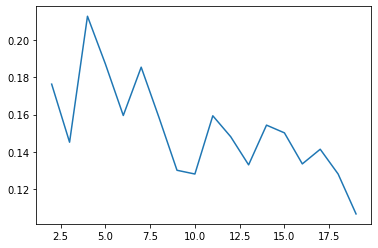

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score

KS = range(2, 20)
inertia = list()
robust = RobustScaler()
for k in KS:
    scaled_cluster2_clear = robust.fit_transform(cluster2_clear)
    scaled_cluster2_clear = pd.DataFrame(scaled_cluster2_clear, columns=cluster2_clear.columns, index=cluster2_clear.index)
    km = KMedoids(n_clusters = k)
    test_predict = km.fit(scaled_cluster2_clear[['교통량','주간유동인구', '압축복합도']])
    inertia.append(silhouette_score(scaled_cluster2_clear[['교통량','주간유동인구', '압축복합도']], test_predict.labels_, metric='euclidean'))

sns.lineplot(KS, inertia)

In [30]:
robust = RobustScaler()
scaled_cluster2_clear = robust.fit_transform(cluster2_clear)
scaled_cluster2_clear = pd.DataFrame(scaled_cluster2_clear, columns=cluster2_clear.columns, index=cluster2_clear.index)
km = KMedoids(n_clusters = 4, random_state=42)
test_predict = km.fit(scaled_cluster2_clear[['교통량','주간유동인구', '압축복합도']])

In [31]:
cluster2_clear.loc[:,'predict'] = test_predict.labels_

C:\Users\ms964\AppData\Local\Temp\ipykernel_26648\2325798580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster2_clear.loc[:,'predict'] = test_predict.labels_


In [32]:
graph2 = grid.join(cluster2_clear, how = 'inner')

In [33]:
cluster2_clear.groupby('predict')['교통량','주간유동인구', '압축복합도'].mean()

C:\Users\ms964\AppData\Local\Temp\ipykernel_26648\4142623731.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster2_clear.groupby('predict')['교통량','주간유동인구', '압축복합도'].mean()


,교통량,주간유동인구,압축복합도
predict,,,
0,414625.480000,12353.157154,1874.977800
1,145241.155844,20505.320596,1656.288831
2,201673.287671,28485.328186,2965.894110
3,224937.666667,145358.473524,2924.075278


In [34]:
graph_df = cluster2_clear[['교통량','주간유동인구', '압축복합도', 'predict']]

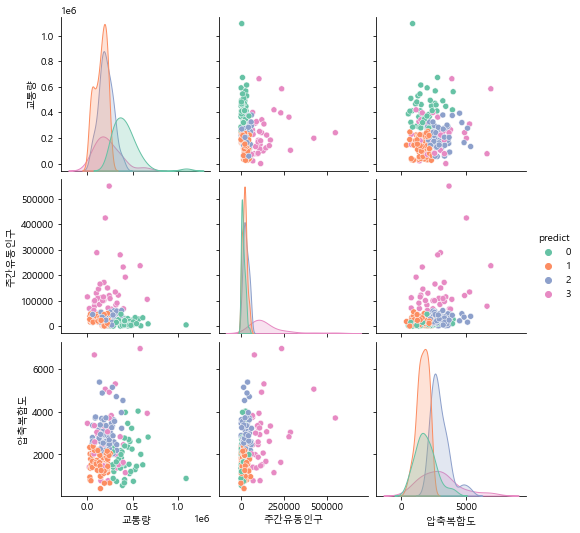

In [35]:
plt.rcParams['font.family'] = 'malgun Gothic'
sns.pairplot(graph_df, hue = 'predict',palette= 'Set2')

In [36]:
layer = pdk.Layer(
    'PolygonLayer', # 사용할 Layer 타입
    graph2[(graph2['predict'] == 0) | (graph2['predict'] == 3)], # 시각화에 쓰일 데이터프레임
    get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
    get_fill_color= '[83*predict, 255,255,100]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
    pickable=True, # 지도와 interactive 한 동작 on
    auto_highlight=True # 마우스 오버(hover) 시 박스 출력
    ,coverage = 1
)

center_seoul = [127.001699, 37.564214]

view_state = pdk.ViewState(
    longitude=center_seoul[0],
    latitude=center_seoul[1],
    zoom=10)

r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.show()

DeckGLWidget(carto_key=None, custom_libraries=[], google_maps_key=None, json_input='{"initialViewState": {"lat…

In [37]:
cluster2_result = cluster2_clear[(cluster2_clear['predict'] == 0) | (cluster2_clear['predict'] == 3)]
cluster2_result

,복합도,압축도,predict,상권유무,주간유동인구,교통량,주차장수,주차가능대수,충전소개수,압축복합도
gid,,,,,,,,,,
다사53a53a,13,92.83,0,True,7040.741719,293423,0,0,0,1206.79
다사55a52a,15,133.53,0,True,12158.629369,301230,3,242,0,2002.95
다사54a52b,13,510.30,3,True,77974.601541,77030,0,0,1,6633.90
다사55a52b,14,100.73,3,True,68880.307575,21219,2,1322,1,1410.22
다사54b53a,13,154.84,0,True,5214.409705,275919,0,0,1,2012.92
...,...,...,...,...,...,...,...,...,...,...
다사65a44a,4,221.59,0,True,0.000000,285534,0,0,1,886.36
다사64a45b,7,210.15,3,True,114187.243507,178021,1,17,1,1471.05
다사65b44a,5,241.60,0,True,2822.852707,481220,0,0,0,1208.00


주차가능대수 ↑

주차장 접근성 ↑

In [38]:
cluster3 = cluster2_result[cluster2_result['충전소개수'] == 0]

In [39]:
cluster3['주차가능대수'].describe()

count     50.000000
mean      80.260000
std      151.655599
min        0.000000
25%        0.000000
50%       21.500000
75%       84.250000
max      873.000000
Name: 주차가능대수, dtype: float64

상위 25% 격자만 추출

In [40]:
fast_final = cluster3[cluster3['주차가능대수'] >= 84.25].sort_values(by = '주차가능대수', ascending=False)

In [41]:
finally_graph = grid.join(fast_final, how = 'inner')

In [42]:
finally_graph

,geometry,coordinates,복합도,압축도,predict,상권유무,주간유동인구,교통량,주차장수,주차가능대수,충전소개수,압축복합도
gid,,,,,,,,,,,,
다사55a52a,"POLYGON ((126.99044 37.56627, 126.99041 37.570...","[[126.99044416422367, 37.56626520598777], [126...",15,133.53,0,True,12158.629369,301230,3,242,0,2002.95
다사55b52a,"POLYGON ((126.99611 37.56629, 126.99608 37.570...","[[126.99610569398969, 37.56628950629747], [126...",14,142.33,3,True,82870.081779,315721,1,873,0,1992.62
다사56a52a,"POLYGON ((127.00177 37.56631, 127.00174 37.570...","[[127.00176723051776, 37.56631353512489], [127...",17,219.67,3,True,67705.235750,247886,6,228,0,3734.39
다사60b51b,"POLYGON ((127.05275 37.56201, 127.05272 37.566...","[[127.05274829480166, 37.56201093119288], [127...",13,173.10,0,True,3440.283489,494343,3,327,0,2250.30
다사58a56a,"POLYGON ((127.02418 37.60246, 127.02416 37.606...","[[127.02418402186846, 37.60245983971597], [127...",13,167.73,0,True,20432.616219,368633,1,146,0,2180.49
다사57b59b,"POLYGON ((127.01832 37.63398, 127.01829 37.638...","[[127.01831625577194, 37.63398295012151], [127...",13,163.01,0,True,7658.276689,383486,5,336,0,2119.13
다사46a45b,"POLYGON ((126.88902 37.50720, 126.88898 37.511...","[[126.88901605816909, 37.50719624993751], [126...",10,152.22,3,True,121364.422215,342273,2,117,0,1522.20
다사42a44a,"POLYGON ((126.84388 37.49343, 126.84384 37.497...","[[126.84387892471344, 37.49343388345357], [126...",13,191.47,0,True,4887.244526,281017,4,194,0,2489.11
다사50b46a,"POLYGON ((126.93990 37.51196, 126.93986 37.516...","[[126.93989538441197, 37.51195523714698], [126...",11,104.96,3,True,191942.586882,420146,1,86,0,1154.56


In [43]:
graph3 = grid.join(cluster2_result, how = 'inner')
layer = pdk.Layer(
    'PolygonLayer', # 사용할 Layer 타입
    finally_graph, # 시각화에 쓰일 데이터프레임
    get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
    get_fill_color= '[255, 100,100,100]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
    pickable=True, # 지도와 interactive 한 동작 on
    auto_highlight=True # 마우스 오버(hover) 시 박스 출력
    ,coverage = 1
)

center_seoul = [127.001699, 37.564214]

view_state = pdk.ViewState(
    longitude=center_seoul[0],
    latitude=center_seoul[1],
    zoom=10)
# mapbox://styles/mapbox/outdoors-v11
r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.show()

DeckGLWidget(carto_key=None, custom_libraries=[], google_maps_key=None, json_input='{"initialViewState": {"lat…

In [44]:
location = [[37.485970900000034, 127.11967949999966], 
[37.495373199999726, 127.02909959999973],
[37.4952425000002, 127.02909830000006],
[37.47297399999964, 127.03394659999995],
[37.6360877999998, 127.01818409999929],
[37.60260119999967, 127.0218710999997],
[37.60365419999986, 127.02447110000006],
[37.60450629999996, 127.01591639999997],
[37.570995899999765, 126.99539689999935],
[37.56666569999959,  126.99177099999997],
[37.567523900000126, 127.00389839999954],
[37.56447839999997, 127.0500297999997],
[37.56413289999962, 127.05335310000011],
[37.564255600000045, 127.05659199999984],
[37.565421700000044, 127.05479710000007],
[37.4958396, 126.8456366],
[37.494160, 126.845692],
[37.5073023, 126.8925842],
[37.4807854, 126.9281219],
[37.5151585, 126.940958]]

location = pd.DataFrame(location, columns= ['위도', '경도'])
location['위치'] = ['문정근린공원 공영주차장', 
        '역삼1문화센터 주차장',
        '역삼1호 공영주차장',
        '양재시민의숲 공영주차장',
        '인수동 공영주차장',
        '길음시장 주차장',
        '길음역환승 주차장',
        '길음 민영주차장',
        '종묘 공영주차장',
        '을삼 민영주차장',
        '훈련원공원 옆 노상공영주차장',
        '용답동 공영주차장',
        '용답 제2공영주차장',
        '우성빌딩 주차장',
        '네모빌딩 주차장',
        '오류문화센터 주차장',
        '오류동 행복주택 주차장',
        '신도림역 민영주차장 ',
        '신림역 중앙주차장',
        '노량진체육시설주차장']

location['주소'] = [
'서울특별시 송파구 문정동 38-3',
'서울 강남구 대치동 78-29',
'서울 강남구 역삼로7길 16',
'서울특별시 서초구 양재동 237',
'서울 강북구 삼양로92길 34',
'서울 성북구 동소문로 229',
'서울 성북구 동소문로 260',
'서울 성북구 길음동 530-14', 
'서울 종로구 종로4가 32-19',        
'서울 중구 충무로 60',
'서울 중구 을지로6가 18-200',
'서울 성동구 용답29길 22',        
'서울 성동구 천호대로 342',
'서울 동대문구 고미술로 99',
'서울 동대문구 천호대로 313',
'서울특별시 구로구 경인로20가길 38 ',
'서울특별시 구로구 오류동 332-128',
'서울 구로구 구로동 3-55',
'서울 관악구 신원로 16',
'서울특별시 동작구 노량진동 13-8']

location.to_excel('../데이터/입지분석/결과/급속충전소입지선정.xlsx')

In [46]:
import folium
from folium.features import CustomIcon
import pandas as pd
from folium import Marker
locationlist = location[['위도', '경도']].values.tolist()
m = folium.Map(location=[37.58, 127.0], tiles='openstreetmap', zoom_start=11)
icon_image1 = 'https://cdn-icons-png.flaticon.com/512/877/877669.png'
icon1 = CustomIcon(
    icon_image1,
    icon_size=(25, 35),
    icon_anchor=(10, 30),
    popup_anchor=(30, -30)
)


for point in range(0, len(location)):
    icon_image1 = 'https://cdn-icons-png.flaticon.com/512/877/877669.png'
    icon1 = CustomIcon(
        icon_image1,
        icon_size=(15, 25),
        icon_anchor=(10, 30),
        popup_anchor=(30, -30)
    )
    folium.Marker(locationlist[point], icon=icon1).add_to(m)
m.save('../이미지/입지분석/급속충전소최종입지.html')
m